In [1]:
import pandas as pd
df = pd.read_csv("complaints.csv")

In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df['vader_scores'] = df['complaint_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['vader_scores'].apply(classify_sentiment)

print(df[['complaint_text', 'sentiment']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...


                                      complaint_text sentiment
0         The road near MG Road is full of potholes.   Neutral
1          Bus number 432 was 30 minutes late today.  Positive
2  Traffic signal is not working at Brigade junct...   Neutral
3      Street lights are off near the metro station.   Neutral
4  There is a deep crack in the main highway surf...   Neutral


In [10]:
from textblob import TextBlob


def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

df[['polarity', 'subjectivity']] = df['complaint_text'].apply(lambda x: pd.Series(get_sentiment(x)))

def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(classify_sentiment)

print(df[['complaint_text', 'polarity', 'subjectivity', 'sentiment']].head())

# df.to_csv("complaints_with_textblob_sentiment.csv", index=False)

                                      complaint_text  polarity  subjectivity  \
0         The road near MG Road is full of potholes.  0.225000      0.475000   
1          Bus number 432 was 30 minutes late today. -0.300000      0.600000   
2  Traffic signal is not working at Brigade junct...  0.000000      0.000000   
3      Street lights are off near the metro station.  0.100000      0.400000   
4  There is a deep crack in the main highway surf...  0.083333      0.366667   

  sentiment  
0  Positive  
1  Negative  
2   Neutral  
3  Positive  
4  Positive  


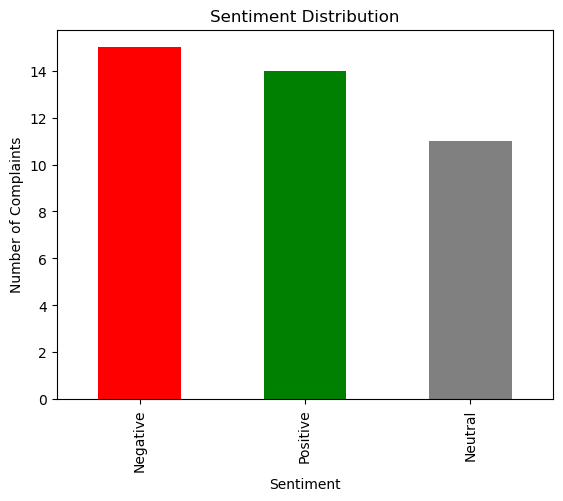

In [12]:
import matplotlib.pyplot as plt

df['sentiment'].value_counts().plot(kind='bar', color=['red', 'green', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Complaints')
plt.show()

In [14]:
category_sentiment = df.groupby('category')['polarity'].mean().sort_values()

<Axes: title={'center': 'Average Polarity per Complaint Category'}, ylabel='category'>

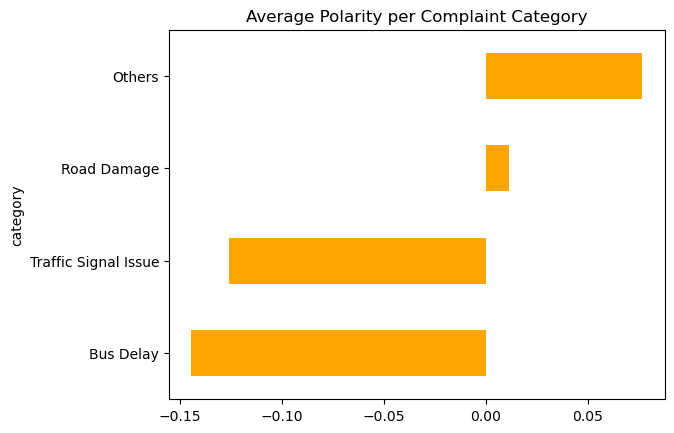

In [16]:
category_sentiment.plot(kind='barh', color='orange', title='Average Polarity per Complaint Category')

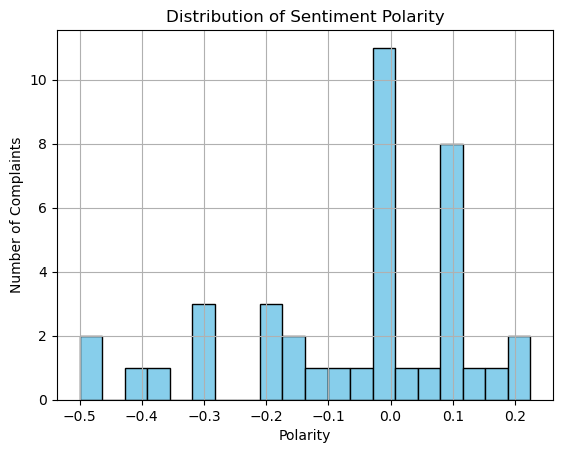

In [18]:
df['polarity'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Polarity")
plt.ylabel("Number of Complaints")
plt.show()

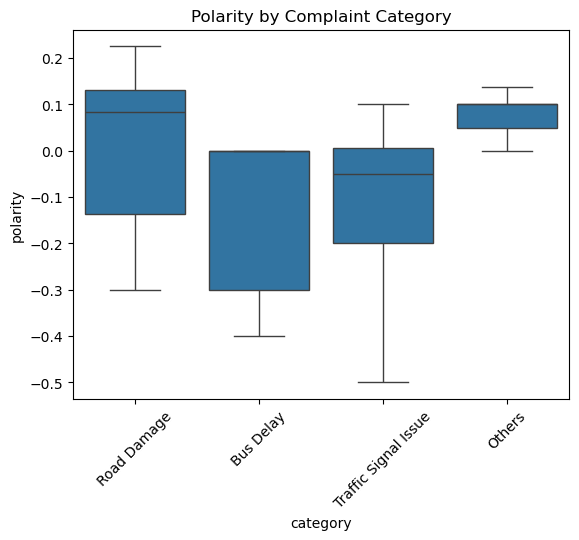

In [20]:
import seaborn as sns

sns.boxplot(data=df, x='category', y='polarity')
plt.xticks(rotation=45)
plt.title('Polarity by Complaint Category')
plt.show()

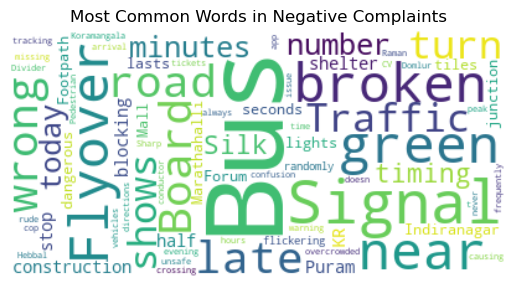

In [22]:
from wordcloud import WordCloud

negative_text = ' '.join(df[df['sentiment'] == 'Negative']['complaint_text'])

wordcloud = WordCloud(background_color='white', max_words=100).generate(negative_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Complaints')
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['complaint_text'])

nmf = NMF(n_components=5, random_state=42)
nmf_topics = nmf.fit_transform(tfidf_matrix)

for topic_idx, topic in enumerate(nmf.components_):
    top_words = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(f"Topic {topic_idx+1}: {' | '.join(top_words)}")

Topic 1: ongoing | metro | dumped | warning | footpath | potholes | garbage | mg | near | road
Topic 2: 210 | 365 | weekdays | late | doesn | number | morning | arrives | time | bus
Topic 3: turns | crossing | sony | world | board | timing | pedestrian | green | junction | signal
Topic 4: cuts | layout | week | tree | fell | damaged | metro | station | street | lights
Topic 5: 274 | skipped | driver | refused | official | shelter | indiranagar | broken | bus | stop
